In [1]:
symbol='BTCUSDT'

In [2]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1DAY  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df)}")
    print(df.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 708 data points. Total so far: 2708
Reached the end of available data.
Total fetched data points: 2708
   timestamp     open     high      low    close       volume
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


In [3]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


In [4]:
df.tail()

,timestamp,open,high,low,close,volume
2703,2025-01-10,92552.49,95836.00,92206.02,94726.11,31482.86424
2704,2025-01-11,94726.10,95050.94,93831.73,94599.99,7047.90430
2705,2025-01-12,94599.99,95450.10,93711.19,94545.06,8606.86622
2706,2025-01-13,94545.07,95940.00,89256.69,94536.10,42619.56423
2707,2025-01-14,94536.11,97371.00,94346.22,96596.00,16543.78763


In [5]:
# Select all rows except the last one
df = df.iloc[:-1]

In [6]:
df.tail()

,timestamp,open,high,low,close,volume
2702,2025-01-09,95060.61,95382.32,91203.67,92552.49,34544.83685
2703,2025-01-10,92552.49,95836.00,92206.02,94726.11,31482.86424
2704,2025-01-11,94726.10,95050.94,93831.73,94599.99,7047.90430
2705,2025-01-12,94599.99,95450.10,93711.19,94545.06,8606.86622
2706,2025-01-13,94545.07,95940.00,89256.69,94536.10,42619.56423


In [7]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [8]:
df_daily=df.copy()

In [9]:
df_daily

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2702,2025-01-09,95060.61,95382.32,91203.67,92552.49,34544.836850
2703,2025-01-10,92552.49,95836.00,92206.02,94726.11,31482.864240
2704,2025-01-11,94726.10,95050.94,93831.73,94599.99,7047.904300
2705,2025-01-12,94599.99,95450.10,93711.19,94545.06,8606.866220


In [10]:
countrows=len(df_daily)
countrows

2707

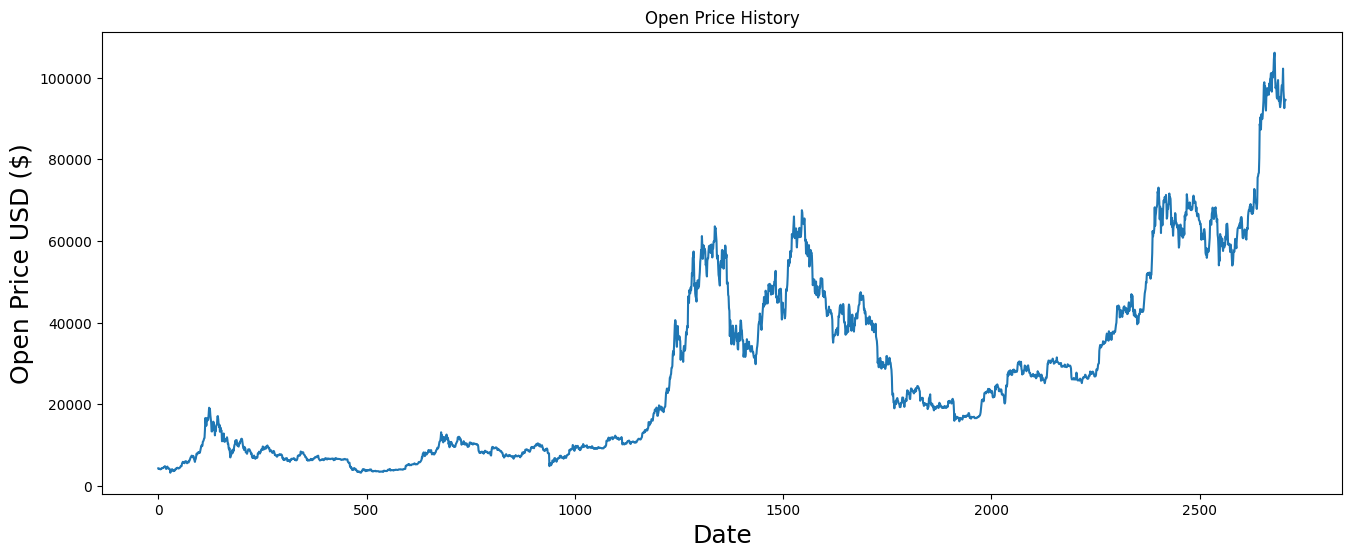

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(df_daily['open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [14]:
import numpy as np
# Create a new dataframe with only the High column 
data = df_daily.filter(['open'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2572

In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01042753],
       [0.01065678],
       [0.00894024],
       ...,
       [0.88918783],
       [0.88796281],
       [0.88742933]])

In [16]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01042753, 0.01065678, 0.00894024, 0.00906274, 0.00855907,
       0.00804298, 0.00827611, 0.00931549, 0.01095723, 0.01061433,
       0.01111751, 0.01089895, 0.01132286, 0.01337122, 0.0132801 ,
       0.01458905, 0.01562134, 0.01282705, 0.01279305, 0.00892665,
       0.01144759, 0.01390791, 0.01460624, 0.01063463, 0.0104016 ,
       0.0093798 , 0.00991386, 0.00943905, 0.00734358, 0.        ,
       0.00472093, 0.00482992, 0.00487626, 0.00847039, 0.0070137 ,
       0.00681893, 0.00393246, 0.00396199, 0.00574604, 0.00458504,
       0.00718816, 0.00674482, 0.00975368, 0.00962614, 0.00958748,
       0.01156415, 0.0117731 , 0.01157882, 0.01094645, 0.00991377,
       0.01098618, 0.01147197, 0.01201594, 0.01410442, 0.01553187,
       0.01549409, 0.01586681, 0.02187541, 0.02391542, 0.02590705])]
[0.02449824776608024]

[array([0.01042753, 0.01065678, 0.00894024, 0.00906274, 0.00855907,
       0.00804298, 0.00827611, 0.00931549, 0.01095723, 0.01061433,
       0.01111751, 0.01089895, 0.01

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2025-01-14 14:23:34.691838: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 14:23:34.695305: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 14:23:34.707900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736864614.728942  104658 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736864614.735611  104658 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 14:23:34.757136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

2512/2512 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - loss: 0.0021


In [18]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
# from keras.callbacks import EarlyStopping, LearningRateScheduler
# from keras.optimizers import Adam

# # Build the LSTM model with improvements
# model = Sequential()

# # Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
# model.add(BatchNormalization())  # Batch normalization

# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))  # Dropout layer

# # Dense layer with 25 neurons
# model.add(Dense(25))

# # Output layer with 1 neuron (regression output)
# model.add(Dense(1))

# # Compile the model with a custom optimizer
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Implement EarlyStopping and LearningRateScheduler callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.1 if epoch % 10 == 0 and epoch != 0 else lr)

# # Train the model
# model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, 
#           callbacks=[early_stopping, lr_scheduler])


In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Actual values for comparison
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scale the predictions

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(predictions - y_test))

# Calculate MSE
mse = np.mean((predictions - y_test) ** 2)

# Calculate R²
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print all metrics
print(f"RMSE: {round(rmse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")
print(f"R²: {round(r2, 2)}")
print(f"MAPE: {round(mape, 2)}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
RMSE: 6158.75
MAE: 5448.52
MSE: 37930216.62
R²: 0.86
MAPE: 6.72%


/tmp/ipykernel_104658/1246026047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


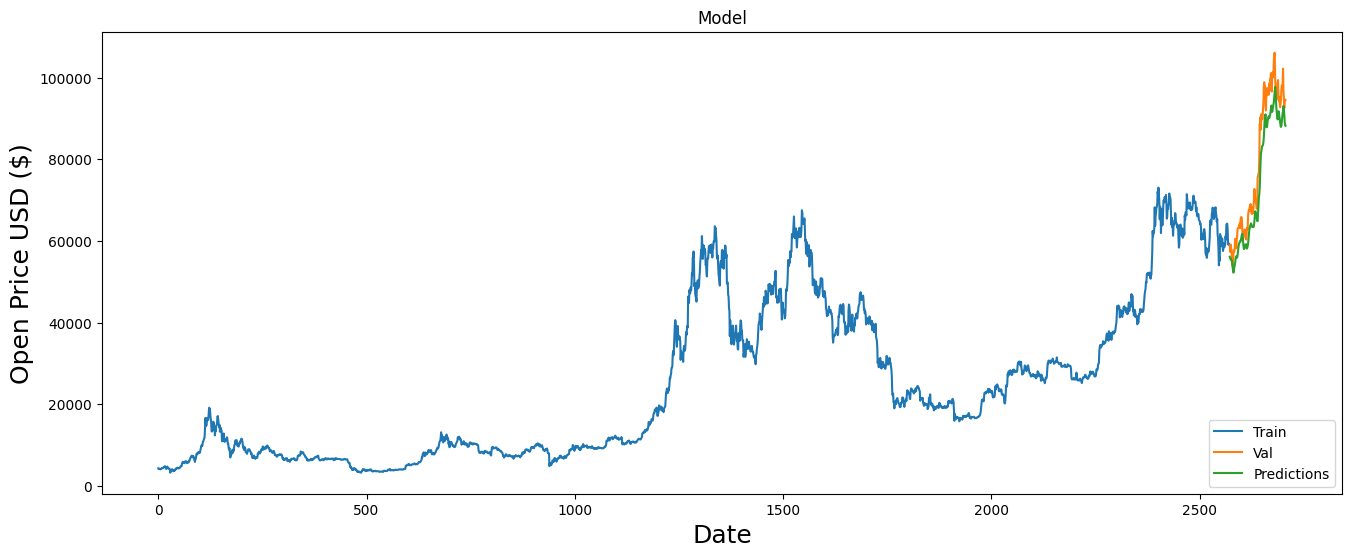

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['open'])
plt.plot(valid[['open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices
valid

,open,Predictions
2572,58974.00,56119.058594
2573,57301.77,55932.742188
2574,59132.12,55465.234375
2575,57487.74,55561.183594
2576,57970.90,55362.707031
...,...,...
2702,95060.61,92512.937500
2703,92552.49,91084.664062
2704,94726.10,89138.710938
2705,94599.99,88376.789062


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

def predict_next_n_days(model, last_sequence, scaler, start_date=None, n_days=5):
    """
    Predict the next n days of prices using the trained model
    
    Parameters:
    model: trained LSTM model
    last_sequence: last 60 days of scaled data
    scaler: fitted MinMaxScaler object
    start_date: starting date for predictions (defaults to today if None)
    n_days: number of days to predict (default 5)
    
    Returns:
    DataFrame with dates and predicted prices
    """
    # Make a copy of the last sequence
    curr_sequence = last_sequence.copy()
    
    # List to store predictions
    future_predictions = []
    
    # Use provided start date or today's date
    if start_date is None:
        start_date = pd.Timestamp.today()  # Current date
    else:
        start_date = pd.to_datetime(start_date)
    
    # Predict n days
    for i in range(n_days):
        # Get prediction for next day
        curr_sequence_reshaped = curr_sequence.reshape((1, curr_sequence.shape[0], 1))
        predicted_price = model.predict(curr_sequence_reshaped)
        
        # Store the prediction
        future_predictions.append(predicted_price[0, 0])
        
        # Update sequence by removing first element and adding the predicted value
        curr_sequence = np.roll(curr_sequence, -1)
        curr_sequence[-1] = predicted_price
    
    # Create dates for predictions starting from the day after start_date
    future_dates = [start_date + timedelta(days=x+1) for x in range(n_days)]
    
    # Convert predictions back to original scale
    predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
    # Create DataFrame with predictions
    future_predictions_df = pd.DataFrame(
        predictions_unscaled,
        index=future_dates,
        columns=['Predicted_Price']
    )
    
    return future_predictions_df

# Usage example:
# Get the last x days of scaled data
last_x_days = scaled_data[-countrows:]

# Reshape the data
last_x_days_scaled = last_x_days.reshape((countrows, 1))

# Make predictions for next 5 days starting from January 12, 2025
future_predictions = predict_next_n_days(
    model=model,
    last_sequence=last_x_days_scaled,
    scaler=scaler,
    start_date= "01-12-2025",
    n_days=5
)

# Print the predictions
print("\nPredicted prices for the next 5 days:")
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

Predicted prices for the next 5 days:
            Predicted_Price
2025-01-13     88367.250000
2025-01-14     86772.148438
2025-01-15     84777.695312
2025-01-16     82748.710938
2025-01-17     80824.023438


In [24]:
# Define the Mean Absolute Error (MAE)
MAE = round(mae, 2)  # Replace with the actual MAE value if known

# Add Max and Min columns
future_predictions['Max'] = future_predictions['Predicted_Price'] + MAE
future_predictions['Min'] = future_predictions['Predicted_Price'] - MAE

# Print the updated DataFrame
print("\nPredicted prices with Max and Min for the next 5 days:")
print(future_predictions)


Predicted prices with Max and Min for the next 5 days:
            Predicted_Price           Max           Min
2025-01-13     88367.250000  93815.773438  82918.726562
2025-01-14     86772.148438  92220.671875  81323.625000
2025-01-15     84777.695312  90226.218750  79329.171875
2025-01-16     82748.710938  88197.234375  77300.187500
2025-01-17     80824.023438  86272.546875  75375.500000
